In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random
import copy

In [18]:
ind_num = 40 #一世代の個体数
gen_num = 8000 #目標の世代数
co_method_num = 0 #交叉の方法
selection_method_num = 0 #淘汰の方法
mutation_probability = 0.1 #突然変異の確率
#交叉の確率を設定。90~95%くらい

In [3]:
class Individual:
  coordinate = 0
  point_num = 0

  def __init__(self, input=0):
    if input == 0:
      self.chromosome = list(range(Individual.point_num))
      random.shuffle(self.chromosome)
    else:
      self.chromosome = input
    self.getFitness()
    #print(self.chromosome)

  def setDefaultCoordinate(self, input):
    Individual.coordinate = copy.deepcopy(input)
  
  def setChromosome(self, input):
    self.chromosome = input

  def getFitness(self):
    self.fitness = 0
    self.temp = []
    for j in range(len(self.chromosome)):
      self.temp.append(Individual.coordinate[self.chromosome[j]])
    #print(self.temp)
    #print(self.coordinate)

    for i in range(len(self.temp)):
      a=self.temp[i]
      if i == len(self.temp)-1:
        b=self.temp[0]
      else:
        b=self.temp[i+1]
      distance=np.linalg.norm(b-a)
      self.fitness += distance
    #print(self.fitness)

  def getChromosome(self):
    return_chromo = copy.deepcopy(self.chromosome)
    return return_chromo

In [4]:
class SelectionTest:
  def selection(self,input):
    #print("start sel")
    #print("before")
    #for i in range(len(input)):
      #print(input[i].fitness)
    #print("after")
    target_leng = int(len(input)/2)
    input.sort(key=lambda x: x.fitness)
    del input[target_leng:]
    #for i in range(len(input)):
      #print(input[i].fitness)

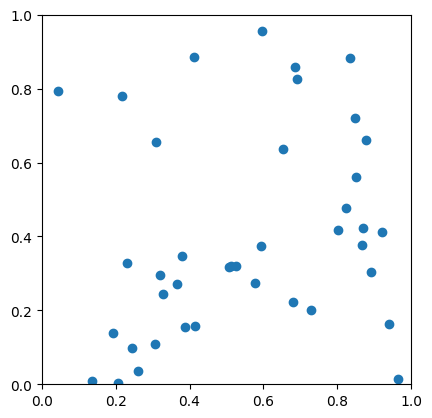

In [5]:
point_num = 40#巡回するポイントの数
#point_list = list(range(point_num))
xPos = np.random.rand(point_num)#ポイントの数だけランダムな座標を生成
yPos = np.random.rand(point_num)
#print(xPos,"\n", yPos)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(xPos, yPos, marker = "o", linestyle = "none")#生成した座標の点のみ描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

coordinate = np.transpose(np.stack([xPos, yPos]))
#print(coordinate)
#print(coordinate[1])

In [6]:
class TestCO:#名前変えろ
  def co(self,input):
    leng = len(input)
    for i in range(0, leng, 2):
      p1 = copy.deepcopy(input[i].chromosome)
      p2 = copy.deepcopy(input[i+1].chromosome)
      ret = self.cotst1201(p1,p2)

      input.append(Individual(ret[0]))
      input.append(Individual(ret[1]))



  def cotst1201(self,input1, input2):
    #print("start co")
    p1 = copy.deepcopy(input1)
    p2 = copy.deepcopy(input2)
    c1 = [-1] * len(p1) #-1で埋めた配列を作成
    c2 = [-1] * len(p2)
    r = random.randrange(len(p1))
    #print(r)
    c1[r] = p1[r]
    c2[r] = p2[r]

    index1 = p1.index(p2[r])
    index2 = p2.index(p1[r])

    c1[index1] = p1[index1]
    c2[index2] = p2[index2]

    #print(c1)
    #print(c2)
      
    del1 = p1.pop(r)
    del2 = p2.pop(r)
    if not del1 == del2:
      p1.remove(del2)
      p2.remove(del1)

    #print(p1)
    #print(p2)
    cout1 = cout2 = 0
    for i in range(len(c1)):
    
      if c1[i] == -1:
        c1[i] = p2[cout1]
        cout1 += 1
      if c2[i] == -1:
        c2[i] = p1[cout2]
        cout2 += 1

    
    #print(c1)
    #print(c2)
    #print("end co")
    return [c1,c2]

In [7]:
class PMX:
    def co(self,input):
        leng = len(input)
        for i in range(0, leng, 2):
          p1 = copy.deepcopy(input[i].chromosome)
          p2 = copy.deepcopy(input[i+1].chromosome)
          ret = self.pmx_co(p1,p2)

          input.append(Individual(ret[0]))
          input.append(Individual(ret[1]))
    
    def pmx_co(self,input1, input2):
        #print("start co")
        copy_1 = copy.deepcopy(input1)
        copy_2 = copy.deepcopy(input2)
        new_1 = [-1] * len(copy_1)
        new_2 = [-1] * len(copy_2)

        cut_len = 3
        #cut_len = int(len(copy_1)/2)# 半分にする。可変長にするならここを変える
        cut_start_point = random.randint(0, len(copy_1) - 1) # どこから切り取るか
        #計算するたびにランダム？世代ごとにランダム？
        copy_1 = copy_1[cut_start_point:] + copy_1[:cut_start_point]#カットの始点が先頭に来るように配列を回転させる
        copy_2 = copy_2[cut_start_point:] + copy_2[:cut_start_point]
        #copy_1の0~cut_lenの要素をnew_1にコピー
        for i in range(cut_len):
            new_1[i] = copy_2[i]
            new_2[i] = copy_1[i]
        
        

        #print(cut_start_point)
        #print(new_1)
        #print(new_2)
        #ここから
        """new_1 = new_1[:cut_len]
        new_1 = new_1 + list(set(copy_1) - set(new_1))
        new_2 = new_2[:cut_len]
        new_2 = new_2 + list(set(copy_2) - set(new_2))
        ##なんかちがうよ##ここまで
        #先に衝突をしないものを同じ場所に入れる
        print(new_1)
        print(new_2)"""
        missing_indexes_1= []
        missing_indexes_2= []
        
        for i in range(len(copy_1)):#一旦重複しない要素をそのままの場所にコピー
            if new_1[i] == -1:
                #if new_1に重複する要素がなかったら
                if copy_1 [i] not in new_1:
                    new_1[i] = copy_1[i]
                else:
                    missing_indexes_1.append(i)#重複してて入れれない場所のインデックスを記録
        
        for i in range(len(missing_indexes_1)):
            for j in range(len(copy_1)):
                if copy_1[j] not in new_1:
                    new_1[missing_indexes_1[i]] = copy_1[j]
                    break


        for i in range(len(copy_2)):
            if new_2[i] == -1:
                if copy_2[i] not in new_2:
                    new_2[i] = copy_2[i]
                else:
                    missing_indexes_2.append(i)

        for i in range(len(missing_indexes_2)):
            for j in range(len(copy_2)):
                if copy_2[j] not in new_2:
                    new_2[missing_indexes_2[i]] = copy_2[j] 
                    break
                
        #print(new_1)
        #print(new_2)





        
        return [new_1, new_2]


In [8]:
def mutation_2(ind):
  new_chromo = copy.deepcopy(ind.chromosome)
  r1 = random.randint(0, len(ind.chromosome) -1)
  r2 = random.randint(0, len(ind.chromosome) -1)
  while r1 == r2:
    r2 = random.randint(0, len(ind.chromosome) -1)

  #print(r1,r2)
  temp = new_chromo[r1]
  new_chromo[r1] = new_chromo[r2]
  new_chromo[r2] = temp
  ind.setChromosome(new_chromo)
  
def mutation_ALL(ind):#壊れすぎてダメかも
  new_chromo = list(range(len(ind.chromosome)))
  random.shuffle(new_chromo)
  ind.setChromosome(new_chromo)


In [22]:
generation=[]
plot_lst = list()
Individual.point_num = point_num
Individual.coordinate = copy.deepcopy(coordinate)
for i in range(ind_num):
  generation.append(Individual())
#genelation[0].setDefaultCoordinate(coordinate)
#for i in range(ind_num):
# genelation[i].getFitness()
min_coordinate = 100000

sel_test = SelectionTest()
#co_test = TestCO()
co_test = PMX()
cnt_m = 0
for i in range(gen_num):
  co_test.co(generation)
  #for i in range(len(genelation)):
    #print(i,genelation[i].fitness)
  sel_test.selection(generation)
  for j in range(ind_num):
    mut_rand = random.random()
    if mut_rand < mutation_probability:
      mutation_ALL(generation[j])
      generation[j].getFitness()
      cnt_m += 1
      #print("mutation", cnt_m)
  generation.sort(key=lambda x: x.fitness)
  plot_lst.append([i,generation[0].fitness])
  if generation[0].fitness < min_coordinate:
    min_coordinate = generation[0].fitness
  random.shuffle(generation)
print("mutation",cnt_m)


mutation 31912


[5, 32, 13, 14, 3, 17, 24, 28, 18, 23, 30, 9, 37, 21, 35, 16, 39, 2, 29, 34, 25, 31, 12, 22, 1, 10, 38, 7, 8, 15, 0, 33, 11, 36, 19, 26, 4, 20, 6, 27]
[[0.36734808 0.27097266]
 [0.30532048 0.10989766]
 [0.51123206 0.31878039]
 [0.80153347 0.41627944]
 [0.59482803 0.95621154]
 [0.65290821 0.637218  ]
 [0.83507032 0.8816077 ]
 [0.23128487 0.327345  ]
 [0.38850131 0.15547162]
 [0.89133723 0.30275777]
 [0.25978291 0.03639559]
 [0.31048718 0.6558179 ]
 [0.20719902 0.00460336]
 [0.87766891 0.66068914]
 [0.92177848 0.41215694]
 [0.37845796 0.3470443 ]
 [0.41453303 0.15755903]
 [0.84928315 0.56118624]
 [0.86828345 0.42220199]
 [0.2183475  0.77958556]
 [0.68649961 0.85882066]
 [0.72990531 0.20191608]
 [0.24448908 0.09722963]
 [0.96399432 0.013584  ]
 [0.86655261 0.37637084]
 [0.32943163 0.24385109]
 [0.41100247 0.88513238]
 [0.68999316 0.8256597 ]
 [0.82398186 0.47672664]
 [0.50788006 0.31609851]
 [0.93830987 0.1642146 ]
 [0.13637343 0.00772218]
 [0.84705451 0.71976208]
 [0.32135443 0.29485479]

(0.0, 1.0)

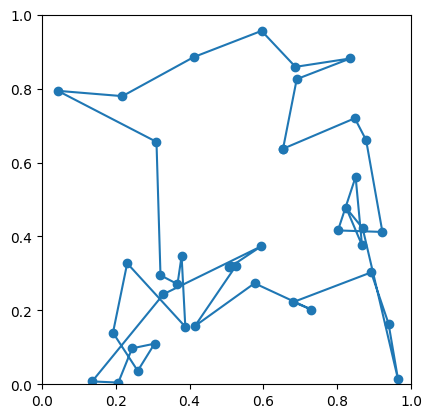

In [23]:
generation.sort(key=lambda x: x.fitness)
print(generation[0].chromosome)

ans = list()
for i in range(point_num):
  ans.append(coordinate[generation[0].chromosome[i]])
ans.append(ans[0])

print(coordinate)
print(ans)


ans_tp = np.transpose(ans)
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(ans_tp[0],ans_tp[1],'-o')#グラフを描画
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

6.525603602755015


(4.0, 18.0)

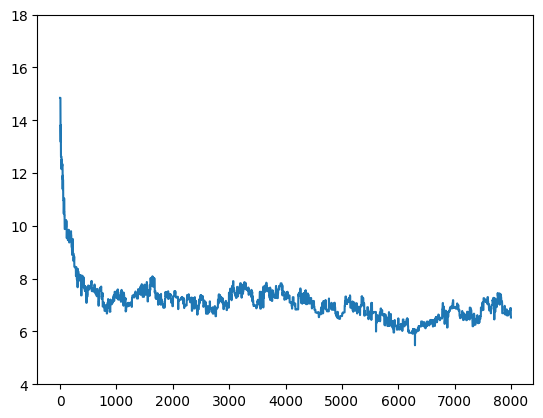

In [24]:
print(plot_lst[len(plot_lst)-1][1])
plot_lst_tp = np.transpose(plot_lst)
#print(plot_lst_tp)
plt.plot(plot_lst_tp[0], plot_lst_tp[1])
plt.ylim(4, 18)


In [ ]:
fig2 = plt.figure()
ax = fig.add_subplot()
plt.plot(xPos, yPos)
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1)
plt.ylim(0, 1)

最低値の時に、そのchromosomeを保存する。
ブランチ切って機能追加する？

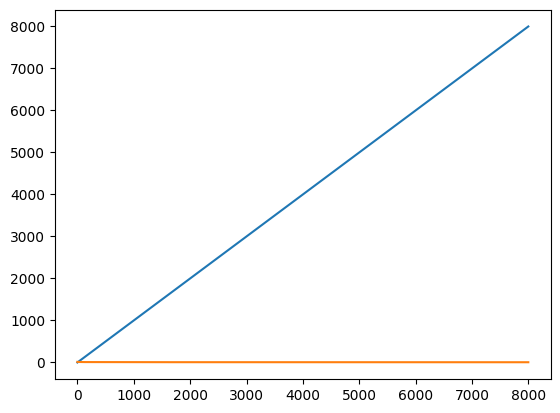

In [14]:
plt.plot(plot_lst)

In [15]:
#plot_listの長さだけfor
for n in range(len(plot_lst)):
    print(plot_lst[n][1])


14.189305826524405
14.189305826524405
13.834424721381506
14.189305826524405
13.617801722105801
13.617801722105801
13.247374332895328
13.295733284635263
13.169797875829914
13.169797875829914
13.169797875829914
13.169797875829914
13.062591071708093
13.258921796745383
12.981871002764384
12.098191913376903
12.098191913376903
12.098191913376903
12.192089796237179
12.192089796237179
12.192089796237179
12.192089796237179
12.177628064018343
12.192089796237179
12.107213382320849
12.107213382320849
12.107213382320849
11.948735603472235
11.871485602520655
11.871485602520655
11.871485602520655
11.871485602520655
11.871485602520655
11.554017579430425
11.554017579430425
11.554017579430425
11.554017579430425
11.496296444306386
11.496296444306386
11.554017579430425
11.554017579430425
11.554017579430425
11.554017579430425
11.554017579430425
11.355069589384998
11.355069589384998
11.355069589384998
11.355069589384998
11.355069589384998
11.355069589384998
11.355069589384998
11.196148800074754
11.214569397